In [1]:
from datasets import load_dataset

dataset = load_dataset("Atomi/semeval_2013_task_7_beetle_5way")
train = dataset["train"]
train_df = dataset["train"].to_pandas()
test = dataset["test"]
test_df = dataset["test"].to_pandas()

### Explore Columns

In [2]:
print(train_df.columns)
print(len(train_df.columns))
assert dataset["train"].column_names == dataset["test"].column_names

Index(['question_id', 'question', 'question_qtype', 'question_module',
       'question_stype', 'reference_answer', 'reference_answer_quality',
       'student_answer', 'label_5way', 'test_set'],
      dtype='object')
10


In [3]:
train_df.sample(3)

,question_id,question,question_qtype,question_module,question_stype,reference_answer,reference_answer_quality,student_answer,label_5way,test_set
3184,CONDITIONS_FOR_BULB_TO_LIGHT,What are the conditions that are required to m...,Q_EXPLAIN_GENERIC,SwitchesBulbsSeries,QUESTION,One terminal of the bulb has to be connected t...,MINIMAL,It must be connected to the battery.,partially_correct_incomplete,training
9981,VOLTAGE_GAP_EXPLAIN_WHY6,Explain why you got a voltage reading of 0 for...,Q_EXPLAIN_SPECIFIC,FaultFinding,EVALUATE,Terminal 6 and the positive terminal are conne...,BEST,the positive terminal is connected to terminal 6,correct,training
5487,BULB_C_VOLTAGE_EXPLAIN_WHY1,Explain why you got a voltage reading of 1.5 f...,Q_EXPLAIN_SPECIFIC,FaultFinding,EVALUATE,Terminal 1 and the positive battery terminal a...,MINIMAL,Its connected to the positive terminal,contradictory,training


In [4]:
print(train_df["question_id"].nunique())
print(train_df["question"].nunique())
questions = train_df[["question_id", "question"]].drop_duplicates()
print(questions.shape)
questions

47
36
(47, 2)


,question_id,question
0,HYBRID_BURNED_OUT_EXPLAIN_Q1,Explain your reasoning.
90,VOLTAGE_INCOMPLETE_CIRCUIT_2_Q,Why?
212,VOLTAGE_DEFINE_Q,What is voltage?
327,SWITCH_OPEN_EXPLAIN_Q,Why does an open switch impact a circuit?
523,GIVE_CIRCUIT_TYPE_HYBRID_EXPLAIN_Q3,Explain your reasoning.
583,VOLTAGE_GAP_EXPLAIN_WHY1,Explain why you got a voltage reading of 1.5 f...
1223,DAMAGED_BUILD_EXPLAIN_Q,Explain your reasoning.
1302,GIVE_CIRCUIT_TYPE_SERIES_EXPLAIN_Q,Explain your reasoning.
1480,BURNED_BULB_PARALLEL_WHY_Q,Why didn^t bulbs A and C go out after bulb B b...
1658,BURNED_BULB_PARALLEL_EXPLAIN_Q2,Explain your reasoning.


## Explore Labels

In [5]:
print(train_df["label_5way"].value_counts())
print(train_df["label_5way"].value_counts(normalize=True))

label_5way
correct                         4222
contradictory                   3058
partially_correct_incomplete    2430
non_domain                       614
irrelevant                       346
Name: count, dtype: int64
label_5way
correct                         0.395689
contradictory                   0.286598
partially_correct_incomplete    0.227741
non_domain                      0.057545
irrelevant                      0.032427
Name: proportion, dtype: float64


<Axes: >

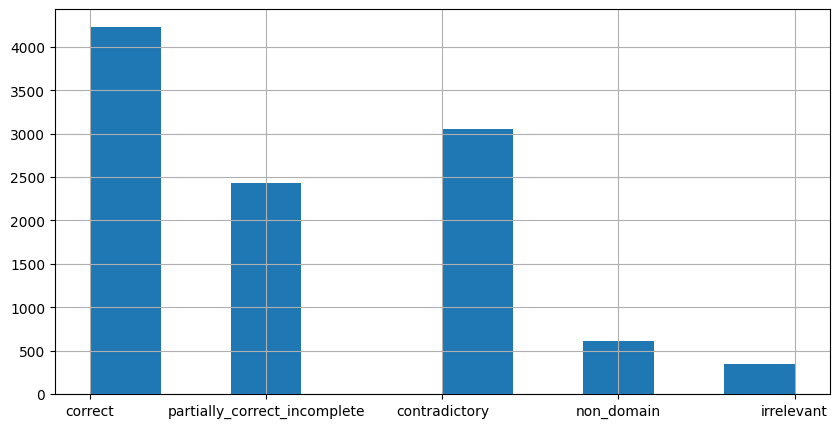

In [6]:
train_df["label_5way"].hist(figsize=(10, 5))

## Explore Dataset Object

In [7]:
train[0]

{'question_id': 'HYBRID_BURNED_OUT_EXPLAIN_Q1',
 'question': 'Explain your reasoning.',
 'question_qtype': 'Q_EXPLAIN_SPECIFIC',
 'question_module': 'SwitchesBulbsParallel',
 'question_stype': 'PREDICT',
 'reference_answer': 'If bulb A burns out, B and C are no longer in a closed path with the battery',
 'reference_answer_quality': 'BEST',
 'student_answer': 'bulb b and c will not be in a closed path with the battery',
 'label_5way': 'correct',
 'test_set': 'training'}

In [8]:
type(train)

datasets.arrow_dataset.Dataset

# Understand Test Set

In [9]:
unseen_answers = test_df[test_df["test_set"] == "unseen-answers"]
unseen_questions = test_df[test_df["test_set"] == "unseen-questions"]

## Unseen Answers

All questions and accompanying reference answers in "unseen answers" have been seen in the training set but the student answers for these questions have not.

In [11]:
# Are there any question student pairs between train and unseen_answers?
train_qa = train_df[["question_id", "student_answer"]].drop_duplicates()
unseen_qa = unseen_answers[["question_id", "student_answer"]].drop_duplicates()
assert len(train_qa.merge(unseen_qa, on=["question_id", "student_answer"])) == 0

In [12]:
# Are there any question reference pairs between train and unseen_answers?
train_qa = train_df[["question_id", "reference_answer"]].drop_duplicates()
unseen_qa = unseen_answers[["question_id", "reference_answer"]].drop_duplicates()
print(len(train_qa.merge(unseen_qa, on=["question_id", "reference_answer"])))
print(len(unseen_qa))

60
60


## Unseen Questions

All questions have not been seen in the training set.

In [14]:
# Are there any questions in unseen-questions that are in train?
unseen_questions = test_df[test_df["test_set"] == "unseen-questions"]
train_qa = train_df[["question_id"]].drop_duplicates()
assert len(unseen_questions.merge(train_qa, on=["question_id"])) == 0